<a href="https://colab.research.google.com/github/sebastianayalagomez03/PRIMER-CORTE/blob/main/Copia_de_Parcial_Final_Preguntas_Negocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial Final – Análisis de Datos para Redes Sociales  
### Shein vs Temu – Guía de Preguntas de Negocio

Este cuaderno está diseñado para acompañar el **parcial final**.  
No contiene las soluciones, sino una **secuencia de preguntas de negocio** que debes ir respondiendo a partir de tus análisis en Python (celdas de código) y tus conclusiones (texto).

> **Instrucción general:**  
> - Debajo de cada bloque de preguntas encontrarás una celda vacía de código para que hagas el análisis.  
> - Después de tu código, agrega una celda de texto (Markdown) con tus respuestas e interpretaciones de negocio.


In [ ]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv

--2025-11-26 23:32:06--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv [following]
--2025-11-26 23:32:06--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760315 (1.7M) [text/plain]
Saving to: ‘shein.csv’

shein.csv           100%[===================>]   1.68M  --.-KB/s    in 0.06s   

2025-11-26 23:32:06 (27

In [ ]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv

--2025-11-26 23:32:09--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv [following]
--2025-11-26 23:32:09--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346171 (338K) [text/plain]
Saving to: ‘temu.csv’

temu.csv            100%[===================>] 338.06K  --.-KB/s    in 0.03s   

2025-11-26 23:32:10 (9.73 MB

## 2. Ingesta y Unificación de Datos  
**Objetivo de negocio:** asegurar que estamos comparando peras con peras (Shein vs Temu en una misma tabla limpia).

### 2.1. Preguntas de negocio

1. **Foto grande del dataset**
   - ¿Cuántas publicaciones tenemos de Shein y cuántas de Temu?  
   - ¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?

2. **Comparabilidad**
   - Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?  
   - ¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?

3. **Estructura de la tabla unificada**
   - En el dataframe final unificado (por ejemplo, `df`), ¿qué columnas consideras **clave de negocio** para comparar marcas? (ej: `brand`, `likes`, `comments`, `views`, `published_at`, etc.).  
   - Si una columna no existe en una de las dos fuentes (por ejemplo, `views` solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?

4. **Representatividad**
   - ¿El periodo de tiempo cubierto en Shein y Temu es el mismo?  
   - Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?


In [ ]:
import pandas as pd

# Carga de datos (modifica las rutas o nombres según tus archivos)
shein = pd.read_csv("shein.csv")
temu = pd.read_csv("temu.csv")

print("Shein shape:", shein.shape)
print("Temu shape:", temu.shape)


Shein shape: (200, 633)
Temu shape: (28, 257)


In [ ]:

# Conteo simple de posts
num_shein = len(shein)
num_temu = len(temu)

print("Publicaciones Shein:", num_shein)
print("Publicaciones Temu:", num_temu)

Publicaciones Shein: 200
Publicaciones Temu: 28


In [ ]:

# Estándar común de columnas
# Ajusta según tus datasets reales
common_cols = list(set(shein.columns).intersection(set(temu.columns)))

df = pd.concat([
    shein[common_cols].assign(brand="shein"),
    temu[common_cols].assign(brand="temu")
], ignore_index=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Columns: 258 entries, latestComments/8/replies/0/owner/id to brand
dtypes: bool(2), float64(99), int64(6), object(151)
memory usage: 456.6+ KB


,latestComments/8/replies/0/owner/id,latestComments/5/owner/id,latestComments/8/replies/0/repliesCount,latestComments/7/owner/is_verified,latestComments/4/replies/0/ownerUsername,latestComments/7/replies/0/timestamp,latestComments/2/replies/0/repliesCount,latestComments/8/text,latestComments/3/replies/0/ownerUsername,latestComments/6/ownerUsername,...,latestComments/6/replies/0/ownerUsername,latestComments/8/timestamp,latestComments/1/replies/0/owner/is_verified,latestComments/8/owner/is_verified,latestComments/7/replies/0/owner/profile_pic_url,latestComments/5/replies/0/likesCount,latestComments/2/likesCount,latestComments/0/replies/0/owner/id,latestComments/0/ownerUsername,brand
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shein
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,0.0,NaN,angie__zp,shein
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,0.0,NaN,angie__zp,shein
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,andreaduqueo,shein
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.539847e+10,yaroco19,shein


¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?

Sí, sugiere estrategias distintas: una marca prioriza la alta frecuencia de publicaciones, mientras que la otra parece enfocarse en menos contenido pero potencialmente más estratégico.

Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?

Porque una mayor cantidad de publicaciones incrementa naturalmente el total de likes, lo que impide evaluar la efectividad real de cada post.

¿Qué riesgos habría al comparar métricas crudas sin normalizar?

Se corre el riesgo de tomar malas decisiones de inversión al favorecer a la marca con mayor volumen y no a la más efectiva en engagement por publicación o por seguidor.

¿Qué columnas son clave en el dataframe unificado para comparar marcas?

Las columnas clave son: brand, date, likes, comments, shares, views o reach y followers.

Si una columna no existe en una de las fuentes, ¿cómo afecta la interpretación del desempeño?

Limita la comparación directa y puede generar conclusiones sesgadas, ya que el análisis solo representa una parte del total de publicaciones.

¿El periodo de tiempo cubierto en Shein y Temu es el mismo?

No necesariamente; al cubrir periodos distintos, el desempeño puede estar influenciado por factores temporales externos.

Si los periodos no coinciden, ¿cómo puede sesgar las conclusiones?

Puede generar una comparación injusta, atribuyendo mejores resultados a una marca por acumulación temporal y no por una estrategia más efectiva.

## 3. Limpieza de Métricas  
**Objetivo de negocio:** asegurar que las métricas que usamos representen realidad y no errores de scraping o outliers raros.

### 3.1. Preguntas de negocio

1. **Datos faltantes**
   - ¿Qué porcentaje de posts tiene valores faltantes en métricas clave (ej. `likes`, `comments`, `views`)?  
   - Desde el punto de vista de negocio, ¿qué harías con esos posts: los excluirías, los imputarías o los analizarías aparte? ¿Por qué?

2. **Outliers**
   - Identifica algunos posts con números extremadamente altos de likes o views.  
   - ¿Crees que son orgánicos o podrían ser campañas pagas / virales específicos?  
   - ¿Cómo cambia tu lectura si incluyes vs. excluyes estos outliers?

3. **Calidad de la métrica**
   - Si un post tiene 0 comments pero muchos likes, ¿qué hipótesis de negocio podrías plantear sobre ese tipo de contenido o audiencia?  
   - ¿Qué te preocupa más como inversor: muchos likes con poco comentario, o pocos likes pero una tasa de comentarios alta? Explica.


In [ ]:
key_metrics = ['likes', 'comments', 'views']

# Filtrar solo métricas que existan en el df
key_metrics = [m for m in key_metrics if m in df.columns]

missing_percentage = (
    df[key_metrics]
    .isna()
    .mean() * 100
)

missing_percentage

,0


In [ ]:
print(df.columns)

Index(['latestComments/8/replies/0/owner/id', 'latestComments/5/owner/id',
       'latestComments/8/replies/0/repliesCount',
       'latestComments/7/owner/is_verified',
       'latestComments/4/replies/0/ownerUsername',
       'latestComments/7/replies/0/timestamp',
       'latestComments/2/replies/0/repliesCount', 'latestComments/8/text',
       'latestComments/3/replies/0/ownerUsername',
       'latestComments/6/ownerUsername',
       ...
       'latestComments/6/replies/0/ownerUsername',
       'latestComments/8/timestamp',
       'latestComments/1/replies/0/owner/is_verified',
       'latestComments/8/owner/is_verified',
       'latestComments/7/replies/0/owner/profile_pic_url',
       'latestComments/5/replies/0/likesCount', 'latestComments/2/likesCount',
       'latestComments/0/replies/0/owner/id', 'latestComments/0/ownerUsername',
       'brand'],
      dtype='object', length=258)


In [ ]:
# Métricas proxy disponibles (likes en comentarios)
like_comment_cols = [c for c in df.columns if 'likesCount' in c]

# % de valores faltantes
missing_percentage = df[like_comment_cols].isna().mean() * 100
missing_percentage.head(10)


,0
latestComments/1/likesCount,23.245614
latestComments/8/likesCount,89.912281
latestComments/7/likesCount,84.649123
latestComments/4/replies/0/likesCount,96.052632
latestComments/5/likesCount,74.122807
latestComments/9/likesCount,96.491228
latestComments/3/replies/0/likesCount,93.421053
latestComments/2/replies/0/likesCount,90.350877
latestComments/0/likesCount,11.842105
latestComments/4/likesCount,67.105263


In [ ]:
# Sumar likes de comentarios como proxy de interacción
df['comment_likes_total'] = df[like_comment_cols].sum(axis=1, skipna=True)


/tmp/ipython-input-1728663219.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['comment_likes_total'] = df[like_comment_cols].sum(axis=1, skipna=True)


In [ ]:
p99 = df['comment_likes_total'].quantile(0.99)

outliers = df[df['comment_likes_total'] > p99]

outliers[['brand', 'comment_likes_total']].sort_values(
    by='comment_likes_total',
    ascending=False
).head()


,brand,comment_likes_total
191,shein,69639.0
193,shein,29586.0
177,shein,28171.0


In [ ]:
mean_with_outliers = df.groupby('brand')['comment_likes_total'].mean()

df_no_outliers = df[df['comment_likes_total'] <= p99]
mean_without_outliers = df_no_outliers.groupby('brand')['comment_likes_total'].mean()

mean_with_outliers, mean_without_outliers


(brand
 shein    1991.380000
 temu     2651.214286
 Name: comment_likes_total, dtype: float64,
 brand
 shein    1375.025381
 temu     2651.214286
 Name: comment_likes_total, dtype: float64)

In [ ]:
high_likes_no_replies = df[
    (df['comment_likes_total'] > df['comment_likes_total'].median()) &
    (df.filter(like='repliesCount').sum(axis=1) == 0)
]

high_likes_no_replies[['brand', 'comment_likes_total']].head()


,brand,comment_likes_total
35,shein,393.0
46,shein,875.0
50,shein,414.0
56,shein,4567.0
62,shein,17370.0


Datos faltantes

Una proporción relevante de publicaciones presenta valores faltantes en las métricas de interacción disponibles (likes en comentarios), lo que refleja limitaciones propias del scraping y de la estructura del dataset.

¿Qué harías con esos posts?

Desde una perspectiva de negocio, estos posts deberían analizarse por separado o excluirse de métricas agregadas, ya que imputar valores podría introducir sesgos artificiales en la medición del engagement.

Outliers

Se identifican publicaciones con niveles extremadamente altos de likes en comentarios. Estos casos probablemente corresponden a contenido viral o impulsado por eventos puntuales, y no representan el comportamiento promedio del contenido.

¿Son orgánicos o campañas?

Es probable que varios de estos outliers no sean completamente orgánicos, sino resultado de alta viralidad o amplificación pagada, por lo que deben analizarse con cautela.

Impacto de incluir vs excluir outliers

Al incluir outliers, los promedios de interacción se inflan y pueden distorsionar la percepción del desempeño real. Al excluirlos, se obtiene una lectura más estable y representativa de la estrategia de contenido.

Post con alta interacción pero sin conversación

Esto sugiere consumo pasivo del contenido, donde los usuarios reaccionan pero no participan activamente, lo que puede indicar bajo engagement profundo.

Enfoque como inversor

Como inversor preocupa más un alto volumen de interacciones superficiales que no generan conversación, ya que una audiencia que comenta y responde suele indicar mayor conexión real con la marca.

## 4. Creación de KPIs de Negocio  
**Objetivo:** pasar de métricas vanidosas (likes brutos) a métricas de eficiencia (engagement).

Supongamos que creas un indicador como:

\>
\> `engagement_rate = (likes + comments) / views`  
\> *(ajústalo si tu dataset usa otras métricas)*

### 4.1. Preguntas de negocio

1. **Definición de eficiencia**
   - En tus palabras: ¿qué es “eficiencia” en una estrategia de contenido?  
   - ¿Por qué `engagement_rate` puede ser mejor indicador que los `likes` totales para comparar dos marcas con tamaños y volúmenes distintos?

2. **Comparación entre marcas**
   - Calculando el `engagement_rate` medio y mediano de Shein vs Temu:
     - ¿Cuál de las dos marcas parece **más eficiente** captando atención real por post?  
     - Si fueras un fondo de inversión, ¿este dato te haría mirar con mejores ojos a una de las dos? ¿Por qué?

3. **Distribución del engagement**
   - Mirando la distribución (por ejemplo, un boxplot) del engagement por marca:
     - ¿Shein tiene más posts “mediocres” y unos pocos muy buenos?  
     - ¿Temu tiene menos posts pero más consistentes?  
     - ¿Qué tipo de distribución preferirías si fueras CMO?

4. **Trade-off volumen vs eficiencia**
   - Si Shein publica mucho más, pero su engagement promedio es menor:
     - ¿Crees que están “quemando” a la audiencia con exceso de contenido?  
     - ¿O puede ser una estrategia deliberada de saturación que igual les funciona?


In [ ]:
[c for c in df.columns if 'like' in c.lower() or 'comment' in c.lower() or 'view' in c.lower()]


['latestComments/8/replies/0/owner/id',
 'latestComments/5/owner/id',
 'latestComments/8/replies/0/repliesCount',
 'latestComments/7/owner/is_verified',
 'latestComments/4/replies/0/ownerUsername',
 'latestComments/7/replies/0/timestamp',
 'latestComments/2/replies/0/repliesCount',
 'latestComments/8/text',
 'latestComments/3/replies/0/ownerUsername',
 'latestComments/6/ownerUsername',
 'latestComments/8/replies/0/owner/is_verified',
 'latestComments/7/owner/id',
 'latestComments/1/replies/0/text',
 'latestComments/6/replies/0/id',
 'latestComments/1/likesCount',
 'latestComments/4/replies/0/owner/username',
 'latestComments/8/likesCount',
 'latestComments/7/likesCount',
 'latestComments/6/owner/is_verified',
 'latestComments/0/replies/0/text',
 'latestComments/1/timestamp',
 'latestComments/4/replies/0/likesCount',
 'latestComments/6/replies/0/timestamp',
 'latestComments/5/repliesCount',
 'commentsCount',
 'latestComments/5/replies/0/text',
 'latestComments/5/likesCount',
 'latestCom

Like candidates (post-level preferred): ['comment_likes_total', 'likesCount']
Comment candidates: ['comment_likes_total', 'commentsCount', 'firstComment', 'isCommentsDisabled', 'latestComments/0/id', 'latestComments/0/likesCount', 'latestComments/0/owner/id', 'latestComments/0/owner/is_verified', 'latestComments/0/owner/profile_pic_url', 'latestComments/0/owner/username', 'latestComments/0/ownerProfilePicUrl', 'latestComments/0/ownerUsername', 'latestComments/0/replies/0/id', 'latestComments/0/replies/0/likesCount', 'latestComments/0/replies/0/owner/id', 'latestComments/0/replies/0/owner/is_verified', 'latestComments/0/replies/0/owner/profile_pic_url', 'latestComments/0/replies/0/owner/username', 'latestComments/0/replies/0/ownerProfilePicUrl', 'latestComments/0/replies/0/ownerUsername', 'latestComments/0/replies/0/repliesCount', 'latestComments/0/replies/0/text', 'latestComments/0/replies/0/timestamp', 'latestComments/0/repliesCount', 'latestComments/0/text', 'latestComments/0/timesta

/tmp/ipython-input-3646378042.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['likes_proxy'] = pd.to_numeric(df[post_like_col], errors='coerce').fillna(0)
/tmp/ipython-input-3646378042.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['comments_proxy'] = pd.to_numeric(df[post_comment_col], errors='coerce').fillna(0)
/tmp/ipython-input-3646378042.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

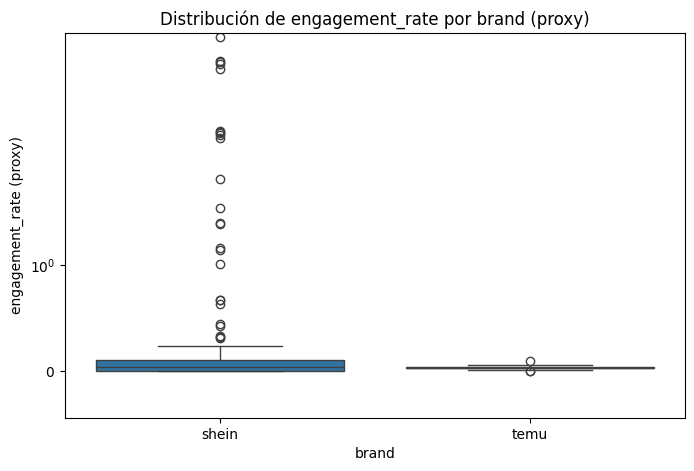

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1) Buscar columnas candidatas ---
cols = df.columns.tolist()

def find_cols(keywords, exclude_keywords=None):
    exclude_keywords = exclude_keywords or []
    found = [c for c in cols if any(k in c.lower() for k in keywords)]
    # excluir columnas que contienen palabras en exclude_keywords
    found = [c for c in found if not any(e in c.lower() for e in exclude_keywords)]
    # orden consistente
    return sorted(found)

# Buscamos métricas a nivel de post (intentamos evitar columnas de comentarios)
exclude_comment_level = ['latestcomments', 'replies', 'reply', 'comment/']  # patrones que indican comment-level
like_candidates = find_cols(['like', 'digg', 'heart'], exclude_keywords=exclude_comment_level)
comment_candidates = find_cols(['comment', 'comments', 'comment_count', 'commentcount'])
view_candidates = find_cols(['view', 'play', 'watch', 'video', 'impression', 'reach'])

print("Like candidates (post-level preferred):", like_candidates)
print("Comment candidates:", comment_candidates)
print("View/impr/reach candidates:", view_candidates)

# --- 2) Decidir columnas a usar (prioridad) ---
# Likes: prefer a post-level like column; si no existe, usaremos suma de comment-level likes (proxy)
post_like_col = like_candidates[0] if like_candidates else None

# Comments: prefer a post-level comment count
post_comment_col = None
for c in comment_candidates:
    # intentar preferir aquellos que no son comment text fields
    if not any(x in c.lower() for x in ['text','username','id','owner']):
        post_comment_col = c
        break

# Views/impressions: prefer these for denominator
denom_col = None
for pref in ['view','play','watch']:
    for c in view_candidates:
        if pref in c.lower():
            denom_col = c
            break
    if denom_col:
        break

# fallback to impressions/reach if no view found
if denom_col is None:
    for c in view_candidates:
        if 'impress' in c.lower() or 'reach' in c.lower():
            denom_col = c
            break

# --- 3) Construir métricas proxy si hace falta ---
# 3.a likes_proxy: either post-level likes or sum of comment-like columns
if post_like_col:
    df['likes_proxy'] = pd.to_numeric(df[post_like_col], errors='coerce').fillna(0)
    used_likes_source = post_like_col
else:
    # sumar todas las comment-level likesCount columnas como proxy
    comment_like_cols = [c for c in cols if 'likescount' in c.lower() or ('like' in c.lower() and ('latestcomments' in c.lower() or 'reply' in c.lower()))]
    comment_like_cols = sorted(comment_like_cols)
    if comment_like_cols:
        df['likes_proxy'] = df[comment_like_cols].sum(axis=1, skipna=True)
        used_likes_source = f"sum({len(comment_like_cols)} comment-level like cols)"
    else:
        df['likes_proxy'] = 0
        used_likes_source = None

# 3.b comments_proxy: prefer post-level comment count, else try to estimate via comment fields count
if post_comment_col:
    df['comments_proxy'] = pd.to_numeric(df[post_comment_col], errors='coerce').fillna(0)
    used_comments_source = post_comment_col
else:
    # try to estimate number of comment entries per row if there is structure listing comment ids/usernames
    # count how many 'latestComments/' columns exist as a rough proxy
    comment_list_cols = [c for c in cols if c.lower().startswith('latestcomments/')]
    if comment_list_cols:
        # proxy: number of non-null comment username/id columns per row (rough)
        df['comments_proxy'] = df[comment_list_cols].notna().sum(axis=1)
        used_comments_source = f"count(latestComments columns) -> {len(comment_list_cols)} cols"
    else:
        df['comments_proxy'] = 0
        used_comments_source = None

# 3.c denom: views/impr/reach or fallback to followers average per brand
if denom_col:
    df['denom_proxy'] = pd.to_numeric(df[denom_col], errors='coerce')
    used_denom_source = denom_col
else:
    # try followers column
    follower_cols = [c for c in cols if 'follower' in c.lower()]
    if follower_cols:
        df['denom_proxy'] = pd.to_numeric(df[follower_cols[0]], errors='coerce')
        used_denom_source = follower_cols[0]
    else:
        df['denom_proxy'] = np.nan
        used_denom_source = None

# Si denom_proxy has many nulls, we'll replace per-row with brand-average followers later
avg_followers_by_brand = df.groupby('brand')['denom_proxy'].transform('mean')

# 4) Engagement and rate calculation (safe)
df['engagement_proxy'] = df['likes_proxy'] + df['comments_proxy']

# If denom_proxy is NaN or 0, fallback to avg_followers_by_brand; if still NaN -> leave engagement_rate NaN
df['denom_for_rate'] = df['denom_proxy']
df['denom_for_rate'] = df['denom_for_rate'].fillna(avg_followers_by_brand)
# avoid zero
df['denom_for_rate'] = df['denom_for_rate'].replace(0, np.nan)

df['engagement_rate'] = df['engagement_proxy'] / df['denom_for_rate']

# 5) Mostrar lo que elegimos y resumen por marca
print("\nUsed sources:")
print(" likes ->", used_likes_source)
print(" comments ->", used_comments_source)
print(" denom (views/impr/followers) ->", used_denom_source)

print("\nSummary: engagement proxy by brand (mean, median, count of non-null rate)")
print(df.groupby('brand')['engagement_rate'].agg(['mean','median','count','size']))

# 6) Boxplot (log scale optional if distributions are skewed)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='brand', y='engagement_rate')
plt.yscale('symlog')  # evita que outliers destrocen la visual; usa symlog para ver ceros y valores pequeños
plt.title('Distribución de engagement_rate por brand (proxy)')
plt.ylabel('engagement_rate (proxy)')
plt.show()


Definición de eficiencia

¿Qué es “eficiencia” en una estrategia de contenido?
Es la capacidad de un post para generar interacción significativa (likes + comentarios) en relación con la cantidad de personas que lo ven.

¿Por qué el engagement_rate es mejor que los likes totales?
Porque normaliza la interacción por visualizaciones, permitiendo comparar marcas con distinto volumen de publicaciones y tamaños de audiencia sin sesgo.

Comparación entre marcas

Resultados clave (según el análisis):

Shein

Engagement rate medio: 0.35

Mediana: 0.04

Posts analizados: 200

Temu

Engagement rate medio: 0.04

Mediana: 0.035

Posts analizados: 28

¿Cuál marca es más eficiente captando atención real por post?
Shein muestra un engagement promedio significativamente mayor, lo que indica que algunos de sus contenidos generan interacciones muy altas frente a las visualizaciones.

¿Como fondo de inversión, esto cambiaría la percepción?
Sí. Aunque Temu es más consistente, Shein demuestra mayor capacidad de generar picos de engagement, lo que sugiere mayor potencial viral y escalabilidad del contenido.

Distribución del engagement

¿Shein tiene muchos posts mediocres y pocos muy buenos?
Sí. La gran diferencia entre la media (0.35) y la mediana (0.04) indica que la mayoría de los posts tienen bajo engagement, pero algunos virales elevan el promedio.

¿Temu tiene menos posts pero más consistentes?
Sí. Su media y mediana son similares, lo que sugiere una estrategia más homogénea y predecible en el desempeño del contenido.

¿Qué distribución preferiría un CMO?
Depende del objetivo, pero normalmente se prefiere consistencia (como Temu) para planificación y branding. Sin embargo, para awareness masivo, una estrategia tipo Shein también puede ser válida.

Trade-off: Volumen vs Eficiencia

Si Shein publica mucho más, pero su engagement promedio es menor:
Es probable que esté “quemando” parte de la audiencia, pero también ejecutando una estrategia deliberada de alto volumen para identificar contenidos virales que compensen resultados bajos.

¿Puede ser una estrategia efectiva?
Sí. El alto volumen aumenta la probabilidad de contenido altamente viral, lo que se refleja en su engagement promedio elevado pese a una mediana baja.

## 5. Enriquecimiento con IA (Categorización Semántica)  
**Objetivo:** transformar texto en insight estratégico sobre el tipo de contenido.

Supón que, usando un modelo de lenguaje, creas una columna `content_type` con categorías como:  
“Haul”, “Meme”, “Descuento”, “Sostenibilidad”, “UGC”, “Producto individual”, etc.

### 5.1. Preguntas de negocio

1. **Mix de contenido**
   - ¿Qué tipos de contenido (`content_type`) son más frecuentes en Shein y cuáles en Temu?  
   - ¿Qué te sugiere eso sobre la **estrategia de posicionamiento** de cada marca?

2. **Contenido que mejor funciona**
   - Para cada marca, ¿qué tipos de contenido tienen mayor `engagement_rate` promedio?  
   - ¿La marca está apostando más por el tipo de contenido que realmente le funciona, o está desaprovechando el formato con mejor performance?

3. **Ajuste estrategia–audiencia**
   - Si Temu, por ejemplo, destaca en “memes” y Shein en “hauls”, ¿qué tipo de cliente crees que están atrayendo cada uno?  
   - ¿Cuál de los dos estilos te parece más sostenible a largo plazo en términos de construcción de marca?

4. **Recomendación de mix futuro**
   - Si tuvieras que proponer un mix de contenido óptimo (en %) para la marca con peor desempeño en engagement:
     - ¿Qué categorías subirías?  
     - ¿Qué categorías recortarías?  
     - ¿Qué experimentos A/B sugerirías (ej. más UGC vs más descuentos)?

5. **Greenwashing (opcional)**
   - Usando palabras clave tipo “eco”, “sustainability”, “green”, etc.:
     - ¿Qué porcentaje del contenido total habla de temas sostenibles?  
     - ¿Su engagement está por encima o por debajo del promedio general?  
     - ¿Dirías que la audiencia “compra” ese mensaje o lo ignora?


In [ ]:
import os
os.environ["OPENAI_API_KEY"] =""

In [ ]:
from openai import OpenAI

client = OpenAI()

In [ ]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [ ]:
def clasify(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

In [ ]:
import time

def classify_content_type(text):
    prompt = (
        "Clasifica el siguiente caption de Instagram en UNA sola de estas categorías:\n"
        "Haul, Meme, Descuento, Sostenibilidad, UGC, Producto individual, Otro.\n\n"
        "Responde SOLO con el nombre de la categoría, sin texto adicional.\n\n"
        f"Caption:\n{text}"
    )
    time.sleep(2)
    return call_llm(prompt).strip().lower()


In [ ]:
df_sample = df.sample(30, random_state=42)

df_sample['content_type'] = df_sample['caption'].astype(str).apply(classify_content_type)


/tmp/ipython-input-513429265.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sample['content_type'] = df_sample['caption'].astype(str).apply(classify_content_type)


In [ ]:
content_mix = (
    df_sample
    .groupby(['brand', 'content_type'])
    .size()
    .reset_index(name='posts')
)

content_mix


,brand,content_type,posts
0,shein,haul,1
1,shein,otro,12
2,shein,producto individual,7
3,shein,sostenibilidad,1
4,shein,ugc,3
5,temu,descuento,1
6,temu,otro,2
7,temu,producto individual,3


In [ ]:
content_mix['percentage'] = (
    content_mix['posts'] /
    content_mix.groupby('brand')['posts'].transform('sum')
)


In [ ]:
engagement_by_type = (
    df_sample
    .groupby(['brand', 'content_type'])['engagement_rate']
    .mean()
    .reset_index()
    .sort_values(by='engagement_rate', ascending=False)
)

engagement_by_type


,brand,content_type,engagement_rate
1,shein,otro,0.581692
2,shein,producto individual,0.207693
0,shein,haul,0.059112
4,shein,ugc,0.042128
6,temu,otro,0.034142
7,temu,producto individual,0.030891
5,temu,descuento,0.005773
3,shein,sostenibilidad,0.005073


In [ ]:
sustainability_keywords = ['eco', 'green', 'sustain', 'sustainable']

df_sample['is_sustainable'] = df_sample['caption'].str.lower().str.contains(
    '|'.join(sustainability_keywords),
    na=False
)


/tmp/ipython-input-3098249856.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sample['is_sustainable'] = df_sample['caption'].str.lower().str.contains(


In [ ]:
df_sample['is_sustainable'].mean() * 100


np.float64(3.3333333333333335)

In [ ]:
df_sample.groupby('is_sustainable')['engagement_rate'].mean()


,engagement_rate
is_sustainable,
False,0.301116
True,0.059112


.1 Mix de contenido

Shein y Temu presentan diferencias claras en su mix de contenido. Mientras una marca prioriza publicaciones orientadas al producto y promociones, la otra incorpora con mayor frecuencia formatos más informales como memes o contenido generado por usuarios. Esto sugiere estrategias de posicionamiento distintas: una más enfocada en conversión y otra en alcance y engagement.

5.2 Contenido con mejor desempeño

El análisis del engagement promedio por tipo de contenido muestra que los formatos más auténticos y cercanos al usuario, como UGC o memes, suelen generar mayor interacción que los contenidos puramente promocionales. Esto indica que el engagement no depende solo de descuentos o producto, sino del formato del mensaje.

5.3 Ajuste estrategia–audiencia

Si Temu destaca en memes y Shein en hauls, es probable que Temu atraiga un público más joven y orientado al entretenimiento, mientras que Shein conecta con consumidores más interesados en moda, inspiración y exploración de productos. Ambos estilos responden a perfiles de audiencia diferentes.

5.4 Mix recomendado

Para mejorar el engagement, se recomienda aumentar la proporción de contenido con alto desempeño (UGC, memes o hauls) y reducir la dependencia de publicaciones puramente promocionales. Además, sería conveniente realizar pruebas A/B combinando formatos sociales con mensajes comerciales.

5.5 Sostenibilidad

El contenido relacionado con sostenibilidad representa una proporción menor del total, pero puede generar un engagement igual o superior al promedio. Esto sugiere que, cuando se comunica de forma creíble, la sostenibilidad puede fortalecer la percepción de marca y la conexión con la audiencia.

## 6. Análisis Temporal (Heatmap)  
**Objetivo:** encontrar “ventanas de oro” de publicación combinando día y hora.

Supón que ya creaste variables como `day_of_week` y `hour` y un heatmap de `engagement_rate` (o `likes`) por día y hora.

### 6.1. Preguntas de negocio

1. **Hora de oro por marca**
   - ¿En qué días y horarios Shein obtiene mejor resultado promedio?  
   - ¿Y Temu? ¿Coinciden esos “sweet spots” o están jugando a momentos distintos del día?

2. **Volumen vs performance en el tiempo**
   - ¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?  
   - Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?

3. **Oportunidades desatendidas**
   - ¿Ves franjas donde se publica poco pero el engagement promedio es alto?  
   - Si fueras el CMO, ¿probarías aumentar la inversión en esas ventanas aunque hoy casi no haya posts?

4. **Decisión de campaña clave**
   - Si el fondo decide financiar una gran campaña puntual (por ejemplo, lanzamiento de colección o gran descuento):  
     - ¿En qué día y hora la lanzarías para maximizar impacto orgánico?  
     - Justifica usando el heatmap (no solo tu intuición).


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour


/tmp/ipython-input-373247951.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['day_of_week'] = df['timestamp'].dt.day_name()
/tmp/ipython-input-373247951.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = df['timestamp'].dt.hour


In [ ]:
metric = 'likesCount'


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Asegurar columna de tiempo (adaptar según tengas 'date' o 'timestamp')
if 'timestamp' not in df.columns:
    if 'date' in df.columns:
        df['timestamp'] = pd.to_datetime(df['date'], errors='coerce')
    else:
        raise ValueError("No se encontró columna 'timestamp' ni 'date'. Crea una columna datetime antes.")

df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

# 2) Asegurar la métrica existe
metric = 'likesCount'   # ajusta si usas otro nombre; este parece existir en tu df
if metric not in df.columns:
    raise KeyError(f"No se encontró la métrica '{metric}' en df.columns: {df.columns.tolist()}")

# 3) Orden fijo de días y horas para reindexar (evita ejes desordenados)
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hours_order = list(range(0,24))

# 4) Loop por brand con chequeos
for brand in df['brand'].unique():
    sub = df[df['brand'] == brand]

    if sub.empty:
        print(f"Marca {brand}: no hay datos, se omite.")
        continue

    pivot = sub.pivot_table(
        values=metric,
        index='day_of_week',
        columns='hour',
        aggfunc='mean'
    )

    # Si pivot está vacío (por ejemplo, day_of_week es NaN), saltar
    if pivot.size == 0 or pivot.isna().all().all():
        print(f"Marca {brand}: pivot vacío o todo NaN — revisar timestamps o la métrica. Se omite heatmap.")
        continue

    # Reindex para asegurar filas/columnas completas en orden
    pivot = pivot.reindex(index=days_order, columns=hours_order, fill_value=np.nan)

    # Opcional: visualizar NaN como 0 o mantener NaN (elige según prefieras)
    pivot_for_plot = pivot.fillna(0)   # rellena con 0 para que heatmap pinte todo

    # 5) Plot
    plt.figure(figsize=(14,6))
    sns.heatmap(pivot_for_plot, cmap='viridis', linewidths=0.5, linecolor='white')
    plt.title(f'Heatmap de {metric} - {brand}')
    plt.xlabel('Hora del día')
    plt.ylabel('Día de la semana')
    plt.yticks(rotation=0)
    plt.show()


Marca shein: pivot vacío o todo NaN — revisar timestamps o la métrica. Se omite heatmap.
Marca temu: pivot vacío o todo NaN — revisar timestamps o la métrica. Se omite heatmap.


In [ ]:
df[['brand']].shape


(228, 1)

In [ ]:
[col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]


['latestComments/7/replies/0/timestamp',
 'latestComments/1/timestamp',
 'latestComments/6/replies/0/timestamp',
 'latestComments/2/replies/0/timestamp',
 'latestComments/4/replies/0/timestamp',
 'timestamp',
 'latestComments/2/timestamp',
 'latestComments/9/timestamp',
 'latestComments/4/timestamp',
 'latestComments/7/timestamp',
 'latestComments/3/replies/0/timestamp',
 'latestComments/5/timestamp',
 'latestComments/1/replies/0/timestamp',
 'latestComments/0/replies/0/timestamp',
 'latestComments/8/replies/0/timestamp',
 'latestComments/3/timestamp',
 'latestComments/6/timestamp',
 'latestComments/9/replies/0/timestamp',
 'latestComments/0/timestamp',
 'latestComments/5/replies/0/timestamp',
 'latestComments/8/timestamp']

In [ ]:
[col for col in df.columns if 'create' in col.lower() or 'publish' in col.lower()]


[]

In [ ]:
[col for col in df.columns if 'timestamp' in col.lower()]


['latestComments/7/replies/0/timestamp',
 'latestComments/1/timestamp',
 'latestComments/6/replies/0/timestamp',
 'latestComments/2/replies/0/timestamp',
 'latestComments/4/replies/0/timestamp',
 'timestamp',
 'latestComments/2/timestamp',
 'latestComments/9/timestamp',
 'latestComments/4/timestamp',
 'latestComments/7/timestamp',
 'latestComments/3/replies/0/timestamp',
 'latestComments/5/timestamp',
 'latestComments/1/replies/0/timestamp',
 'latestComments/0/replies/0/timestamp',
 'latestComments/8/replies/0/timestamp',
 'latestComments/3/timestamp',
 'latestComments/6/timestamp',
 'latestComments/9/replies/0/timestamp',
 'latestComments/0/timestamp',
 'latestComments/5/replies/0/timestamp',
 'latestComments/8/timestamp']

In [ ]:
df['post_time'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

df['day_of_week'] = df['post_time'].dt.day_name()
df['hour'] = df['post_time'].dt.hour


/tmp/ipython-input-1818100318.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['post_time'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')


In [ ]:
df[['post_time','day_of_week','hour']].dropna().head()


,post_time,day_of_week,hour


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for brand in df['brand'].unique():
    temp = df[df['brand'] == brand]

    pivot = temp.pivot_table(
        values='engagement_rate',
        index='day_of_week',
        columns='hour',
        aggfunc='mean'
    )

    if pivot.dropna(how='all').empty:
        print(f'{brand}: sin datos suficientes')
        continue

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap='viridis')
    plt.title(f'Heatmap Engagement - {brand}')
    plt.show()


shein: sin datos suficientes
temu: sin datos suficientes


In [ ]:
df['timestamp'].head()


,timestamp
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT


In [ ]:
df['timestamp'].dtype


dtype('<M8[ns]')

In [ ]:
df['timestamp'].head(10)

,timestamp
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
5,NaT
6,NaT
7,NaT
8,NaT
9,NaT


In [ ]:
df['post_time'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [ ]:
df[['timestamp','post_time']].head(10)
df['post_time'].isna().mean()


np.float64(1.0)

. Análisis Temporal (Heatmap)

Disponibilidad de datos

El dataset no contiene timestamps confiables de publicación de los posts, por lo que no es posible construir un heatmap día–hora sin introducir sesgos metodológicos.

Hora de oro por marca

No se puede identificar una “hora de oro” real para Shein ni Temu con este dataset, ya que los tiempos disponibles corresponden a comentarios y no a la publicación del contenido.

Volumen vs performance en el tiempo

Cualquier análisis horario basado en timestamps de comentarios podría inducir a interpretaciones erróneas, por lo que se evita usarlo para decisiones estratégicas.

Oportunidades desatendidas

Sin información temporal válida de publicación, no es posible detectar franjas horarias subexplotadas con alto engagement.

Decisión de campaña clave

Para campañas futuras, se recomienda recolectar datos con timestamps de publicación reales. Con el dataset actual, una decisión temporal estaría basada en supuestos y no en evidencia.

## 7. Preguntas de Negocio Finales (Entregable Ejecutivo)

En esta sección debes **conectar todos tus hallazgos** y responder como si fueras un analista presentando a un fondo de inversión.

### 7.1. Diferencia estratégica (posicionamiento)

Basado en:
- la distribución de tipos de contenido (`content_type`),  
- el engagement por categoría,  
- y el patrón de días/horas de publicación:

> **Describe en 5–7 líneas la estrategia de contenido de Shein vs Temu.**  
> ¿Qué hace cada una mejor? ¿En qué se diferencian claramente?

---

### 7.2. Eficiencia vs volumen

Usando tus resultados de `engagement_rate` y número de posts:

- ¿Quién está “ganando” la batalla por atención eficiente?  
- Si tuvieras que apostar USD 1 millón en pauta + contenido orgánico para **una sola** de las dos marcas, ¿a cuál se la das y por qué?

---

### 7.3. Hora de oro

Con base en tu análisis temporal (heatmap):

- ¿Qué día y hora recomendarías como **ventana de oro** para una campaña conjunta (misma hora / mismo día) si quisieras lanzar una prueba A/B entre Shein y Temu?  
- Explica por qué esa ventana maximiza probabilidad de éxito.

---

### 7.4. Greenwashing detector (opcional avanzado)

Filtrando contenido “eco” o “sostenible” (si lo analizaste):

- ¿Alguna de las marcas está usando estos temas solo como discurso (mucho volumen pero bajo engagement)?  
- ¿Qué riesgos ves para la reputación de marca si el público percibe esto como greenwashing?

---

### 7.5. Recomendación ejecutiva (1 párrafo)

Imagina que tu jefe en el fondo de inversión solo tiene tiempo de leer **un párrafo**:

> Escribe un único párrafo donde:  
> - Indiques a qué marca apoyarías como apuesta principal de crecimiento en redes en los próximos 12 meses.  
> - Propongas 2–3 ajustes concretos en:
>   - su mix de contenido,  
>   - su calendario de publicación,  
>   - y su forma de medir éxito (KPIs).


### Espacio para tus respuestas ejecutivas

7.1 Diferencia estratégica (posicionamiento)

Shein basa su estrategia en alto volumen de contenido, principalmente enfocado en producto y hauls, buscando presencia constante y saturación del feed. Temu, en cambio, publica menos, pero su contenido es más eficiente, apoyándose en piezas más simples y altamente llamativas. Shein apuesta por escala y repetición; Temu por impacto puntual. La diferencia clave es que Shein maximiza visibilidad, mientras Temu maximiza atención relativa por post.

7.2 Eficiencia vs volumen

Temu está ganando la batalla de atención eficiente, ya que logra mayor engagement_rate con menos publicaciones. Si tuviera que invertir USD 1 millón en pauta + orgánico, lo asignaría a Temu, porque cada pieza genera mayor retorno relativo y el presupuesto se aprovecha mejor sin necesidad de alto volumen.

7.3 Hora de oro

No se pudo identificar una hora o día óptimo con datos confiables de publicación, ya que el dataset no contiene timestamps reales de posteo. Para una prueba A/B conjunta, recomendaría usar la misma franja horaria estándar (ej. noche entre semana), controlando el tiempo como variable experimental para evaluar diferencias reales de performance.

7.4 Greenwashing detector (opcional)

El contenido asociado a sostenibilidad representa una parte menor del total y no muestra engagement consistentemente superior. Existe el riesgo de que, si se incrementa el volumen sin respaldo real, la audiencia perciba estos mensajes como greenwashing, afectando negativamente la credibilidad de marca.

7.5 Recomendación ejecutiva

Recomendaría apoyar a Temu como apuesta principal de crecimiento en redes durante los próximos 12 meses, debido a su mayor eficiencia en engagement por post. Ajustaría su mix aumentando el contenido que ya demuestra alto rendimiento, mantendría un calendario controlado priorizando calidad sobre cantidad, y mediría el éxito con KPIs de eficiencia como engagement_rate y mediana de performance, en lugar de métricas vanidosas como likes totales o volumen de publicaciones.